In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
import librosa # to extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt # to generate the visualizations
# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizer_v1 import rmsprop
print("imported")

imported


# New Section

In [5]:
#importing data set from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
def extract_mfcc(wav_file_name):
 #This function extracts mfcc features and obtain the mean of each dimension
 #Input : path_to_wav_file
 #Output: mfcc_features’’’
 y, sr = librosa.load(wav_file_name)
 mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
 return mfccs

In [ ]:
##### load radvess speech data #####
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/audio_speech/'):
 for filename in filenames:
    #print(os.path.join(dirname, filename))
    radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
    wav_file_name = os.path.join(dirname, filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MFCC features/file
 
print("Finish Loading the Dataset")

In [7]:
ravdess_speech_data



[array([-5.9465033e+02,  6.5885933e+01,  3.8942990e+00,  1.6259735e+01,
         1.1006070e+01,  5.4757676e+00,  7.3000245e+00, -1.5478462e+00,
         1.5193076e-01,  7.5439234e+00, -1.7017698e+00,  1.8102229e+00,
         4.8909965e+00, -5.6530096e-02, -5.7528961e-01,  3.5865220e-01,
        -7.2991520e-01,  1.1479985e+00, -3.8577160e-01,  1.7657439e+00,
        -1.0445507e+00,  1.6170971e+00, -2.2849851e+00,  1.1054467e+00,
        -1.8432782e+00,  7.7901804e-01, -1.7050654e+00,  3.5914350e+00,
        -8.1643754e-01,  4.2951822e-01, -4.0658894e-01, -4.2174926e-01,
        -1.0554163e+00,  1.4656785e+00, -1.5250283e+00,  9.1229185e-02,
        -8.9723684e-02, -6.2372786e-01, -1.7925327e+00, -9.8949146e-01],
       dtype=float32),
 array([-4.9932452e+02,  4.1795593e+01,  6.1610311e-01,  6.2888227e+00,
        -1.3965204e+00,  1.5457021e-01, -3.5077538e+00, -3.5235517e+00,
        -5.9490170e+00,  1.5406041e-01,  2.6695088e-01, -2.6812787e+00,
        -8.7829286e-01, -3.3527002e+00, 

In [8]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions
#### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape

(2880, 8)

In [9]:
ravdess_speech_data_array.shape


(2880, 40)

In [10]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [11]:
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)


In [12]:
# Define the LSTM model
def create_model_LSTM():
 model = Sequential()
 model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
 model.add(Dense(64))
 model.add(Dropout(0.4))
 model.add(Activation('relu'))
 model.add(Dense(32))
 model.add(Dropout(0.4))
 model.add(Activation('relu'))
 model.add(Dense(8))
 model.add(Activation('softmax'))
 
 # Configures the model for training
 model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
 return model

In [13]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [14]:
w.shape

(2304, 40, 1)

In [15]:
### train using LSTM model
model_A = create_model_LSTM() 
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1),labels_categorical[training_samples:training_samples+validation_samples]), epochs=128, shuffle=True)


Epoch 1/128
72/72 [==============================] - 7s 56ms/step - loss: 2.0497 - accuracy: 0.1658 - val_loss: 1.9567 - val_accuracy: 0.2396
Epoch 2/128
72/72 [==============================] - 3s 43ms/step - loss: 1.9781 - accuracy: 0.2174 - val_loss: 1.9006 - val_accuracy: 0.2743
Epoch 3/128
72/72 [==============================] - 3s 40ms/step - loss: 1.9450 - accuracy: 0.2391 - val_loss: 1.8615 - val_accuracy: 0.3056
Epoch 4/128
72/72 [==============================] - 3s 39ms/step - loss: 1.9251 - accuracy: 0.2504 - val_loss: 1.8533 - val_accuracy: 0.2951
Epoch 5/128
72/72 [==============================] - 3s 39ms/step - loss: 1.8704 - accuracy: 0.2704 - val_loss: 1.7940 - val_accuracy: 0.3194
Epoch 6/128
72/72 [==============================] - 3s 39ms/step - loss: 1.8573 - accuracy: 0.2826 - val_loss: 1.8031 - val_accuracy: 0.2708
Epoch 7/128
72/72 [==============================] - 3s 40ms/step - loss: 1.8440 - accuracy: 0.2799 - val_loss: 1.7539 - val_accuracy: 0.2951
Epoch 

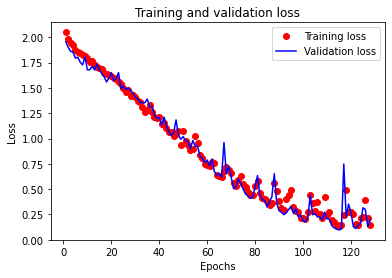

In [16]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

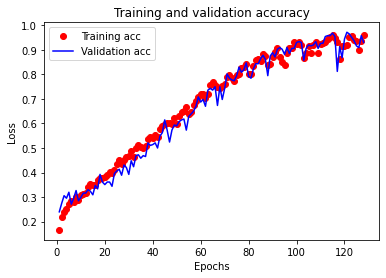

In [17]:
### accuracy plots using LSTM model
plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 13ms/step - loss: 0.1035 - accuracy: 0.9722


[0.1035473644733429, 0.9722222089767456]

In [19]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 
'surprised'}
def predict(wav_filepath):
 test_point=extract_mfcc(wav_filepath)
 test_point=np.reshape(test_point,newshape=(1,40,1))
 predictions=model_A.predict(test_point)
 print(emotions[np.argmax(predictions[0])+1])

In [20]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_02/03-01-01-01-01-01-02.wav')

neutral


In [21]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_02/03-01-01-01-01-01-02.wav')

neutral


In [21]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_15/03-01-08-01-02-01-15.wav')

surprised


In [22]:
model_A.save('mymodel.h5')

In [23]:
modelc=tf.keras.models.load_model('mymodel.h5')

In [24]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_01/03-01-01-01-01-01-01.wav')

neutral


In [25]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_06/03-01-01-01-01-02-06.wav')

neutral


In [26]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_09/03-01-01-01-02-02-09.wav')

neutral


In [27]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_09/03-01-08-01-02-02-09.wav')

surprised


In [28]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_09/03-01-07-01-02-01-09.wav')

disgust


In [29]:
predict('/content/drive/MyDrive/Colab Notebooks/audio_speech/Actor_12/03-01-05-01-02-02-12.wav')

angry


In [ ]:
from google.colab import drive
drive.mount('/content/drive')